In [174]:
# Toute les import a faire pour une bonne utilisation de panda librairie.
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

# librairies a importer pour avoir les notion de date et de temps.
from datetime import datetime, date, time

# autre librairie importante à importer car elle contient un parser qui permet de detecter le format des strings de type date
# et les convertit automatiquement.
from dateutil.parser import parse

import json
import ast

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [175]:
l1 = ['Wikipedia movie ID','Freebase movie ID','Movie release date','Character name','Actor date of birth','Actor gender','Actor height'
     ,'Actor ethnicity','Actor name','Actor age at movie release','actor map ID','Freebase character ID','Freebase actor ID']

l2 = ['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date','Movie box office revenue','Movie runtime','Movie languages','Movie countries','Movie genres']

character_metadata = pd.read_csv("character.metadata.tsv",sep='\t')
movie_metadata = pd.read_csv("movie.metadata.tsv",sep='\t')
tropes = pd.read_csv("tvtropes.clusters.txt",sep='\t',header = None, names = ['absent_minded_professor','{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'])

character_metadata.columns = l1
movie_metadata.columns = l2

movie_metadata = movie_metadata.dropna(subset = ['Movie release date'])
movie_metadata = movie_metadata[movie_metadata['Movie genres'] != '{}']
movie_metadata = movie_metadata[movie_metadata['Movie countries'] != '{}']


#x= tropes['{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'][1]
#y = json.loads(x)
#print(y["id"])

In [176]:
character_metadata.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [177]:
movie_metadata.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [178]:
tropes.head(5)

,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"": ""Flubber"", ""id"": ""/m/0jy9q0"", ""actor"": ""Robin Williams""}"
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [179]:
#for i in range (0,len(movie_metadata)):
#    x = movie_metadata['Movie release date'][i]
#    print(x)
#    movie_metadata['Movie release date'][i] = x[0:4]


len(movie_metadata)
#for i in range(0,15):
#    x = movie_metadata['Movie release date'][i]
#    movie_metadata['Movie release date'][2] = x[0:4]

def extractor(x):
    y = json.loads(x)
    z = y.values()
    u = list(z)[0]
    return(u)
    
def extractor2(x):
    y = json.loads(x)
    z = y.values()
    u = list(z)
    return(u)
  
def trope_id_extractor(x):
    y = json.loads(x)
    z = y["id"]
    return(z)
    
movie_metadata['Movie release date'] = movie_metadata['Movie release date'].apply(lambda x: x[0:4]) 
movie_metadata['Movie release date'] = movie_metadata['Movie release date'].apply(lambda x: x[0:4]) 
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(lambda o: extractor(o))
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(lambda o: extractor2(o))
tropes['Actor ID'] = tropes['{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'].apply(lambda o:trope_id_extractor(o))   

#movie_metadata.years 
#movie_metadata[3] =movie_metadata[3].apply(lambda x: x[0:3]) 

#datetime.strptime(movie_metadata.loc[1][3], '%y/%m/%d %H:%M')
#movie_metadata.loc[1][3]

#date_str = '2000-02-16'
#date_obj = datetime.strptime(date_str, '%Y-%m-%d')
#date_obj.day
#movie_metadata[3][1][0:4]

#x =movie_metadata['Movie countries'][0]
#print(x)
#y = json.loads(s)
#k = y.values()
#print(list(k)[0])

#print(extractor(x))

In [180]:
movie_metadata.head(5)

tropes.head(5)

,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"": ""Flubber"", ""id"": ""/m/0jy9q0"", ""actor"": ""Robin Williams""}",Actor ID
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":...",/m/0jy9q0
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi...",/m/02vchl3
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S...",/m/0k6fkc
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!...",/m/0k6_br
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""...",/m/0k3rhh


In [181]:
movie_metadata = movie_metadata.sort_values(ascending = [True],by = ['Movie release date'] )
movie_metadata_grouped = movie_metadata.groupby(['Movie release date','Movie countries'])


[3 2 1 1]


<BarContainer object of 4 artists>

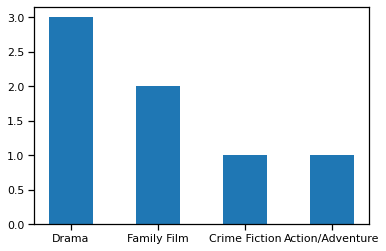

In [182]:



data_of_interest = movie_metadata_grouped[["Movie countries", "Movie genres","Movie release date"]]
data = data_of_interest.get_group(('1988','Norway'))
#print(data)
l= []
for i in range(0,len(data)):
    l = l + data['Movie genres'].iloc[i]
    
#data['Movie genres'].iloc[0]
# iloc c'est les indices de lignes par défaut c'est a dire en comptant a partir de début.
# iloc est la seule pour accéder aux index par défaut;
# loc c'est les indices de lignes tel que dans la colonne d'index de lignes
#print(l)
m = pd.Series(l)
#print(m)
s = m.value_counts()
print(s.values)
plt.bar(s.index, s.values, width=0.5)

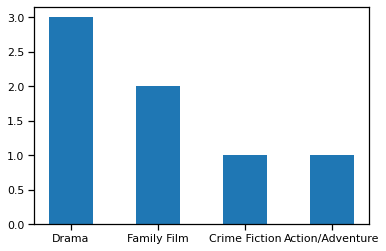

In [183]:
def genres_histogram_plotter(year,land,data_grouped):
    data_of_interest = data_grouped[["Movie countries", "Movie genres","Movie release date"]]
    data_of_interest = data_of_interest.get_group((year,land))
    l= []
    for i in range(0,len(data_of_interest)):
        l = l + data_of_interest['Movie genres'].iloc[i]
    bareplot_data = pd.Series(l).value_counts()
    plt.bar(bareplot_data.index, bareplot_data.values, width=0.5)
    
genres_histogram_plotter('1988','Norway',movie_metadata_grouped)    
#print(min(movie_metadata_grouped["Movie release date"]))


    

In [184]:
s = list(movie_metadata['Movie countries'])
s = list(dict.fromkeys(s))
print(s)

['Turkey', 'United Kingdom', 'United States of America', 'France', 'Germany', 'Mexico', 'Argentina', 'Denmark', 'Russia', 'Azerbaijan', 'England', 'China', 'Netherlands', 'Italy', 'Australia', 'Austria', 'Finland', 'Spain', 'Czech Republic', 'Czechoslovakia', 'Serbia', 'Poland', 'India', 'Romania', 'Sweden', 'Hungary', 'Norway', 'Switzerland', 'Canada', 'Hong Kong', 'New Zealand', 'Estonia', 'Japan', 'Weimar Republic', 'Philippines', 'Brazil', 'Burma', 'Soviet Union', 'Georgian SSR', 'Thailand', 'Bolivia', 'Colombia', 'Korea', 'Belgium', 'Indonesia', 'South Korea', 'Ukraine', 'Crime', 'Israel', 'Portugal', 'Nazi Germany', 'Iran', 'Sri Lanka', 'Egypt', 'Ireland', 'Yugoslavia', 'Croatia', 'German Democratic Republic', 'Morocco', 'Greece', 'Malaysia', 'Soviet occupation zone', 'Pakistan', 'Kingdom of Great Britain', 'West Germany', 'South Africa', 'Bangladesh', 'Bulgaria', 'Tunisia', 'Uzbekistan', 'Albania', 'Scotland', 'Singapore', 'Uzbek SSR', 'Republic of Macedonia', 'Cyprus', 'Sociali

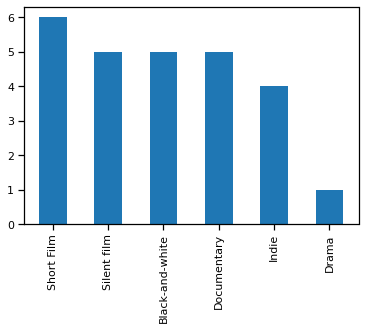

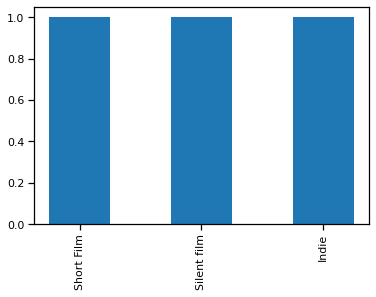

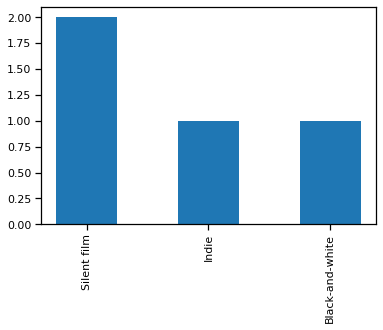

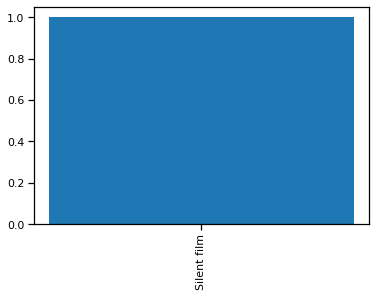

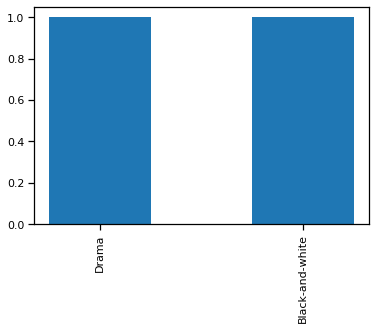

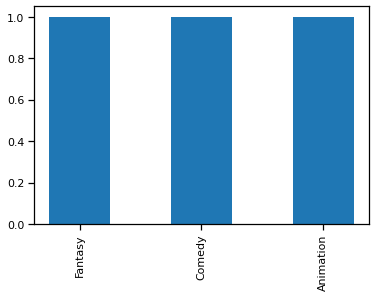

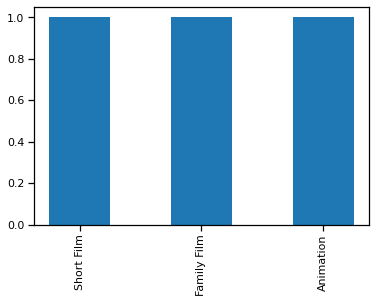

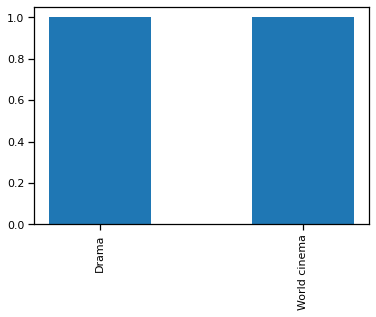

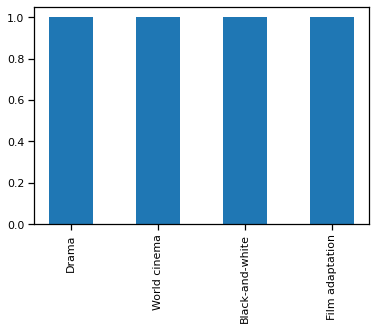

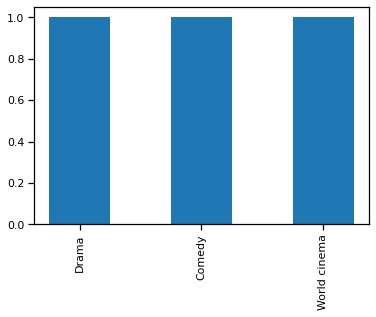

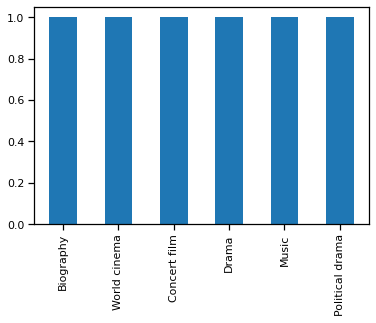

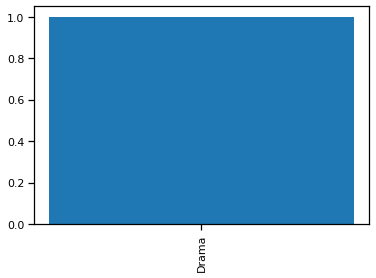

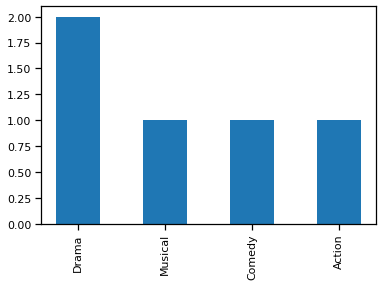

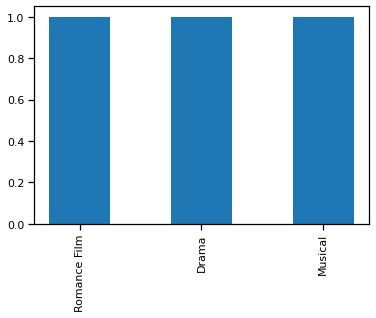

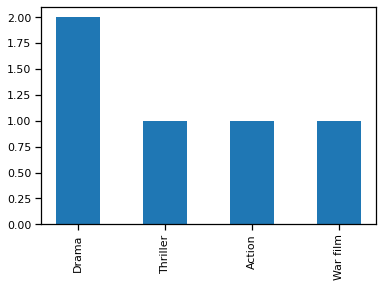

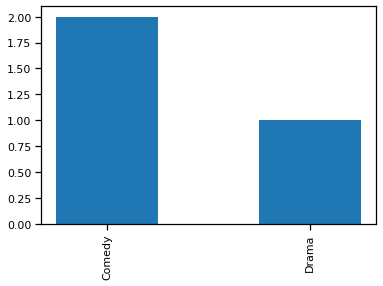

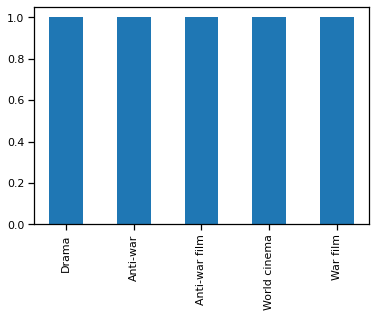

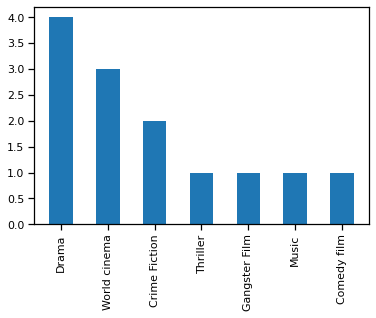

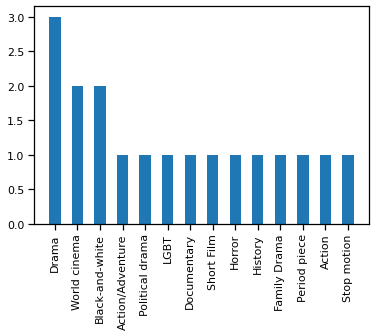

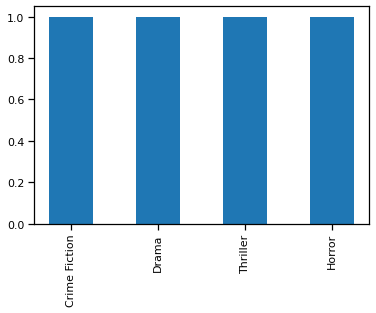

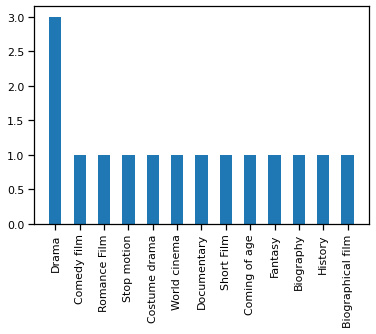

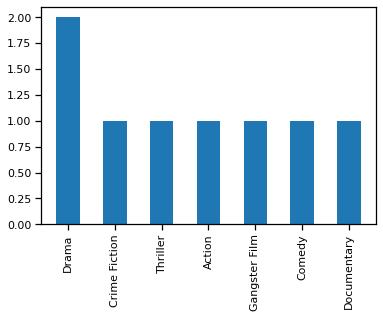

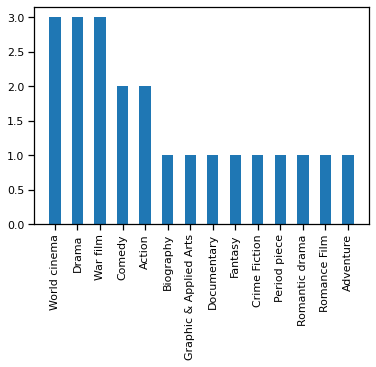

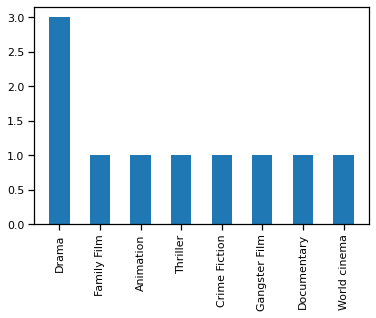

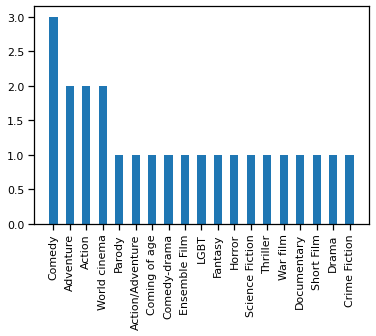

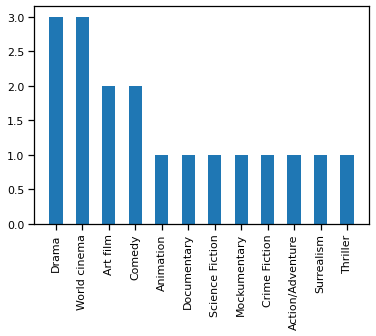

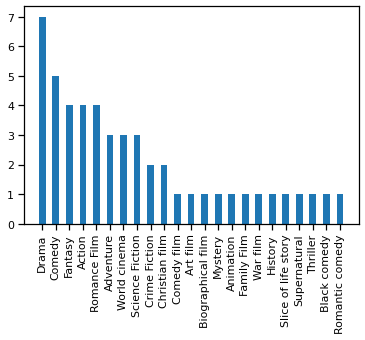

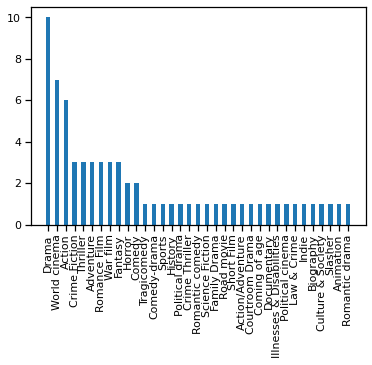

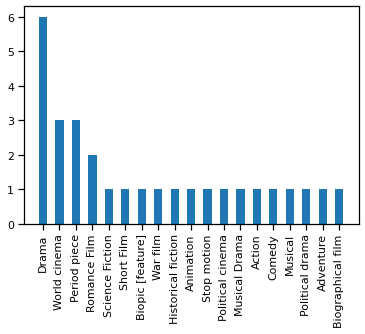

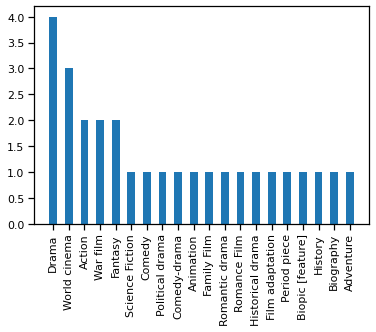

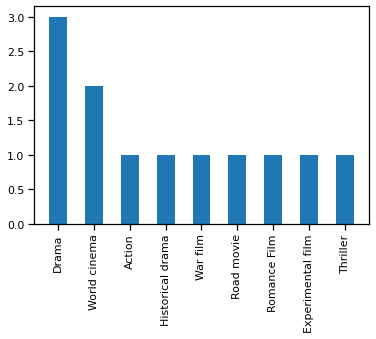

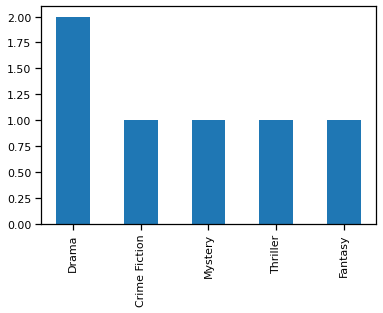

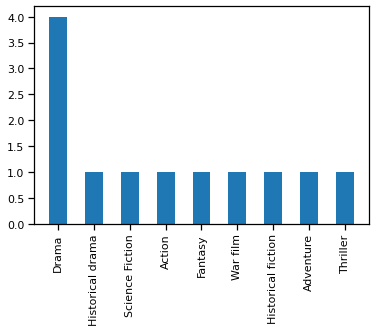

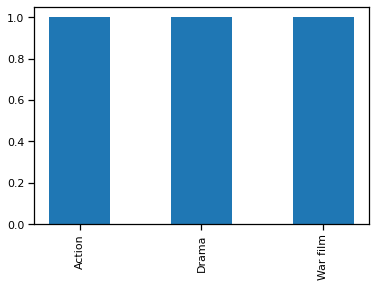

In [185]:

def land_movie_plotter(data,land,data_grouped):
    d1 = data[data['Movie countries'] == land]
    d2 = data_grouped
    p = list(d1['Movie release date'])
    p = list(dict.fromkeys(p))
    for e in p:
        genres_histogram_plotter(e,land,d2)
        plt.xticks(rotation=90)
        plt.show()

        
        
land_movie_plotter(movie_metadata,'Russia',movie_metadata_grouped)

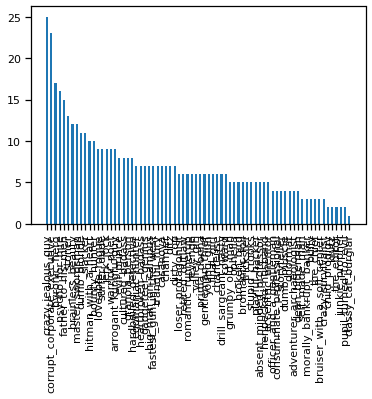

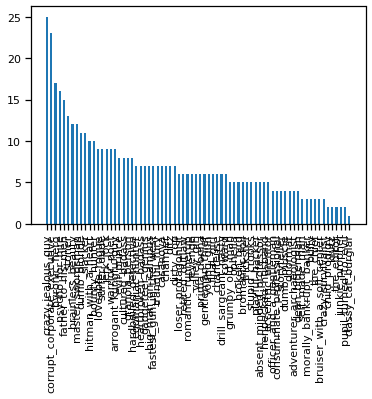

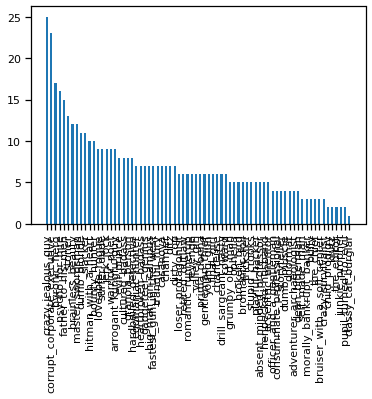

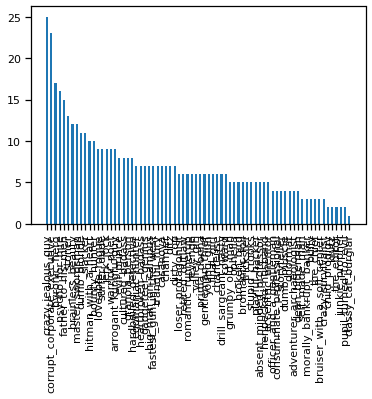

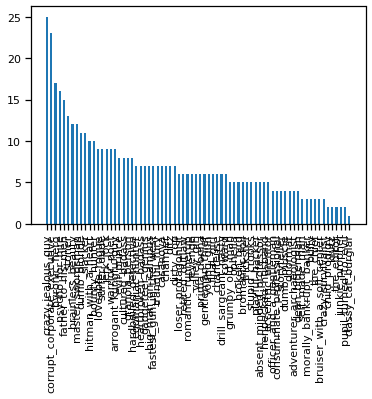

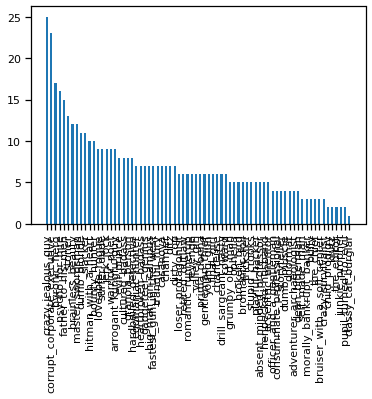

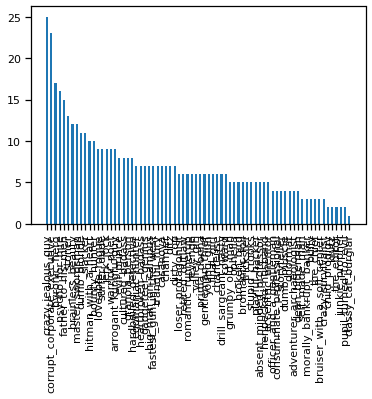

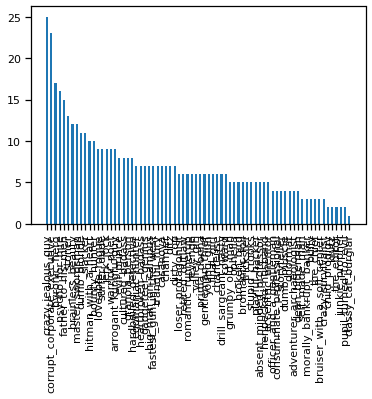

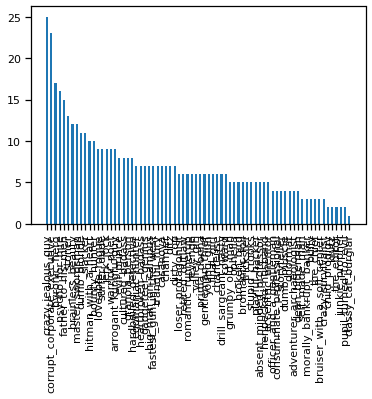

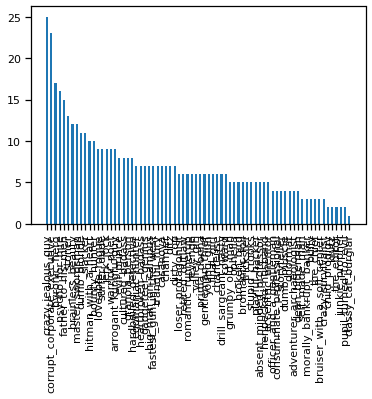

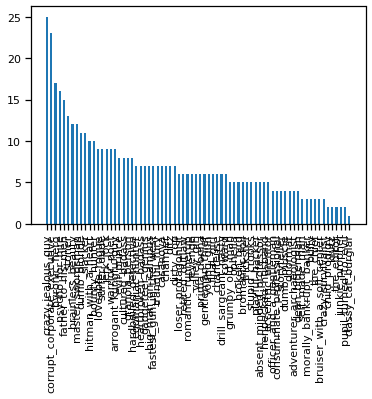

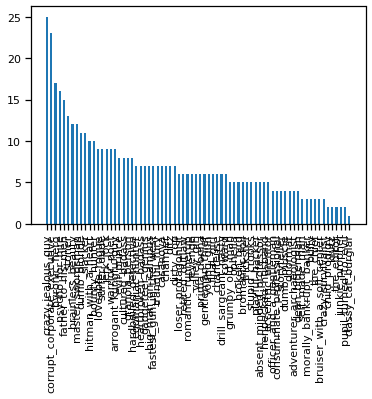

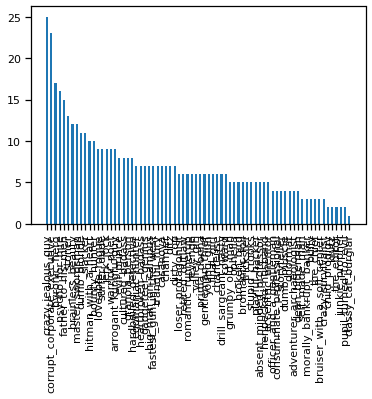

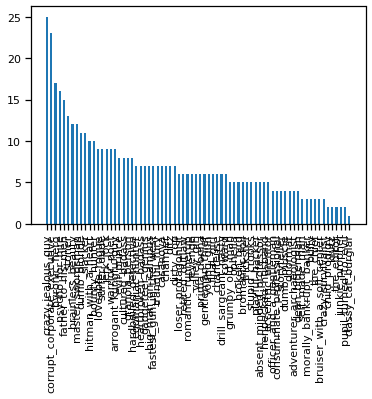

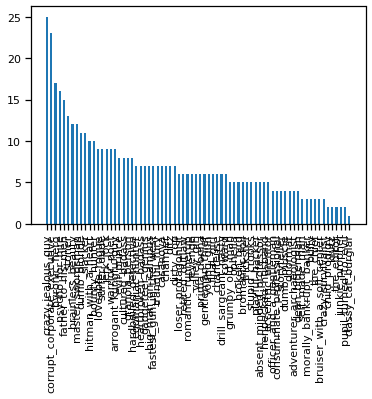

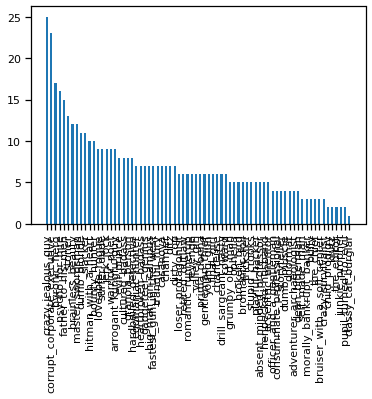

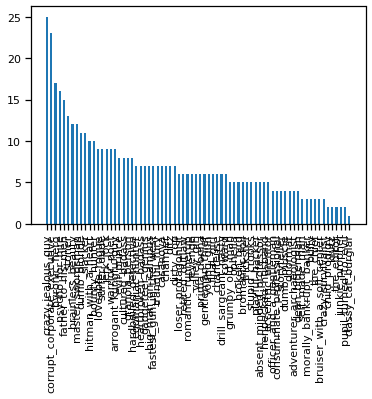

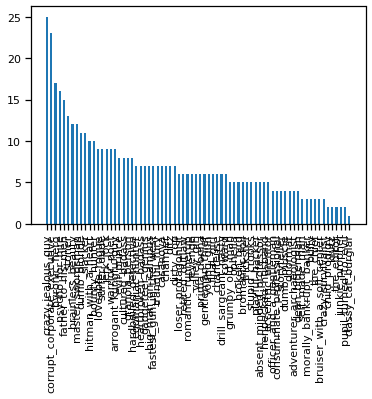

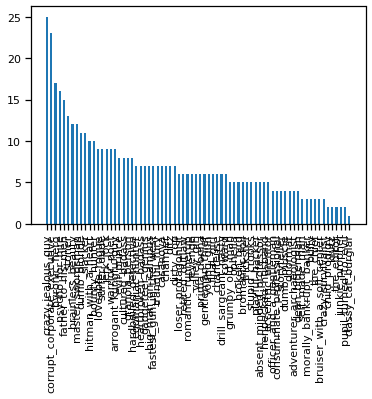

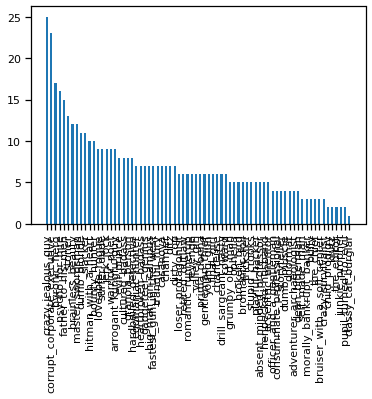

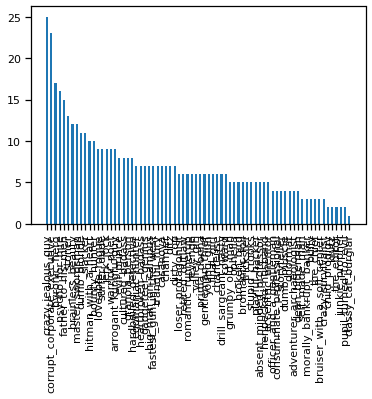

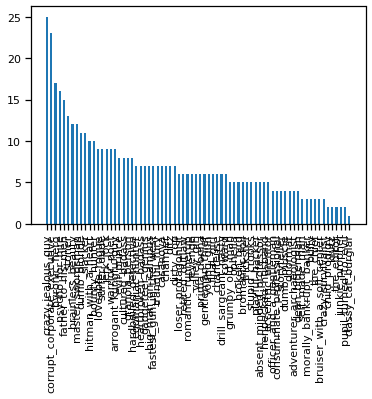

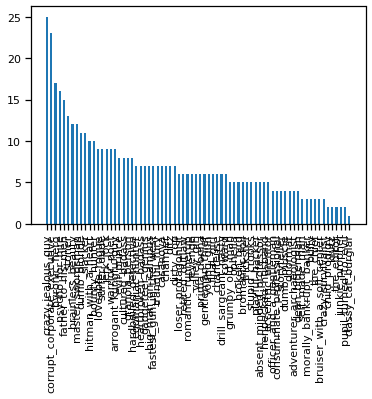

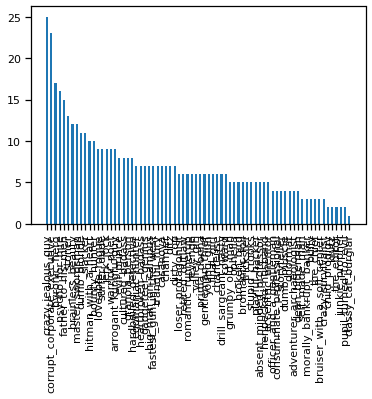

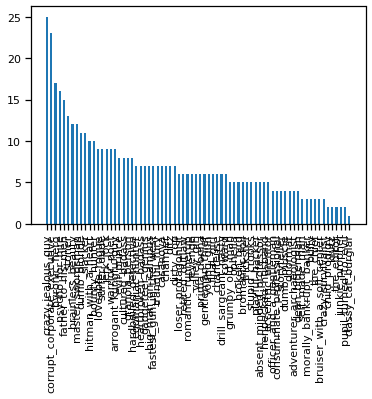

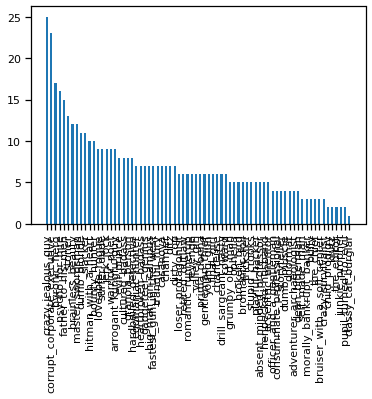

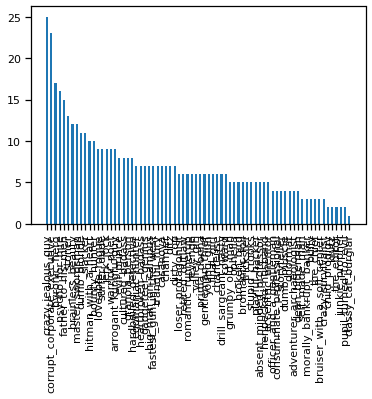

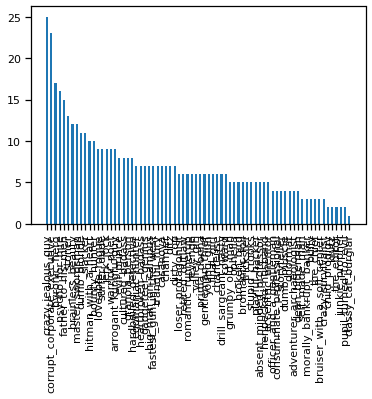

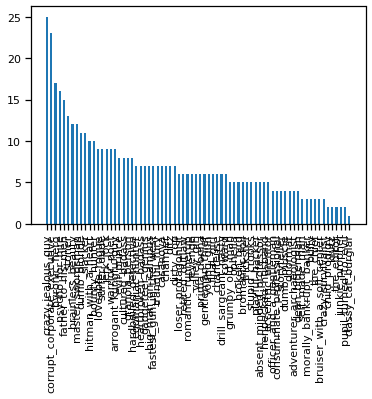

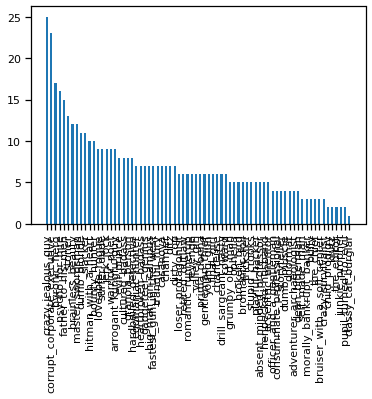

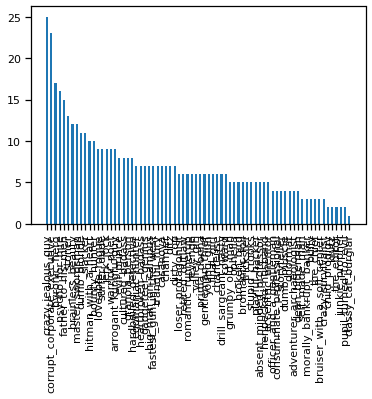

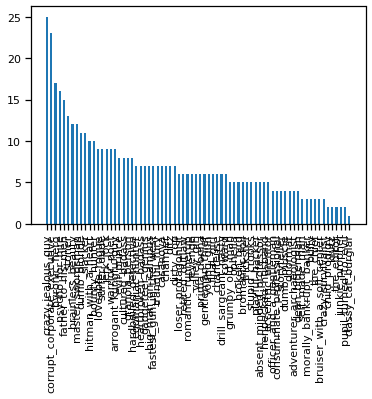

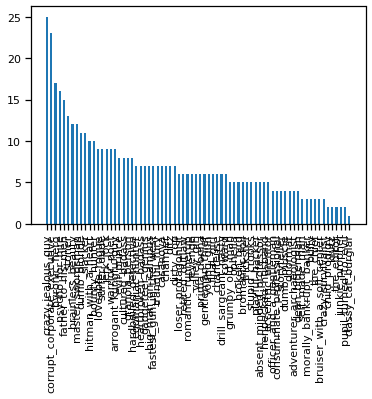

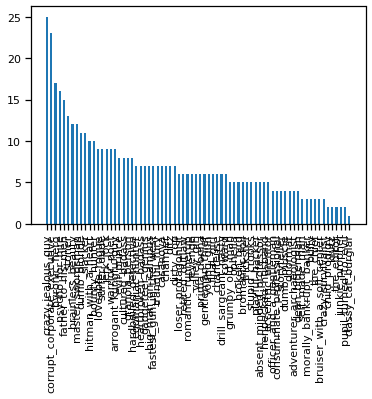

In [187]:

def roles_histogram_plotter(grouped_data,year,land):
    data_of_interest = movie_metadata_grouped[["Movie countries","Movie release date","Freebase movie ID"]]
    data_of_interest = data_of_interest.get_group((year,land))
    l= []
    for i in range(0,len(data_of_interest)):
        u = data_of_interest['Freebase movie ID'].iloc[i]
        l.append(u)
    data_of_interest.head()
    actor_ID = character_metadata[character_metadata['Freebase movie ID'].isin(l)]
    actor_ID = actor_ID['actor map ID']
    ID = list(actor_ID)
    type_of_character = tropes[tropes['Actor ID'].isin(ID)]
    list_of_character = list(tropes["absent_minded_professor"])
    list_of_character
    bareplot_data = pd.Series(list_of_character).value_counts()
    plt.bar(bareplot_data.index, bareplot_data.values, width=0.5)


    
    
def role_movie_plotter(data,land,data_grouped):
    d1 = data[data['Movie countries'] == land]
    d2 = data_grouped
    p = list(d1['Movie release date'])
    p = list(dict.fromkeys(p))
    for e in p:
        roles_histogram_plotter(d2,e,land)
        plt.xticks(rotation=90)
        plt.show()

        
        
role_movie_plotter(movie_metadata,'Russia',movie_metadata_grouped)
#plt.xticks(rotation=90,fontsize = 5)